# Experiment 10 - 2 zeroshot learning evaluation with noisy PS

In [2]:
import numpy as np
import torch
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from model import analysis
from importlib import reload
import tools
import pandas as pd
analysis = reload(analysis)
plt.rcParams['font.sans-serif'] = "Arial"

In [7]:
datadir = '../../data/model_results/experiment10/'
figuredir = '../figures/manuscriptFigures/Fig5_ANNPS/'

palette = sns.color_palette("Set2")


# Load data

In [4]:
simstart = 0 
simend = 40

df_adam0 = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0.insert(len(df_adam0.columns),"Simulation",list(np.repeat(simstart,len(df_adam0))),True)
df_adam0.insert(len(df_adam0.columns),"Layers",list(np.repeat(2,len(df_adam0))),True)
df_adam0.insert(len(df_adam0.columns),"Training",list(np.repeat('Simple task pretraining',len(df_adam0))),True)
#
df_adam0_1rule = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_pretraining_simData' + str(simstart) + '.csv')
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_1rule))),True)
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Layers",list(np.repeat(2,len(df_adam0_1rule))),True)
df_adam0_1rule.insert(len(df_adam0_1rule.columns),"Training",list(np.repeat('Concept pretraining',len(df_adam0_1rule))),True)
#
df_adam0_nopretraining = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_simData' + str(simstart) + '.csv')
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_nopretraining))),True)
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Layers",list(np.repeat(2,len(df_adam0_nopretraining))),True)
df_adam0_nopretraining.insert(len(df_adam0_nopretraining.columns),"Training",list(np.repeat('Vanilla',len(df_adam0_nopretraining))),True)
#
df_adam0_combined = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(simstart) + '.csv')
df_adam0_combined.insert(len(df_adam0_combined.columns),"Simulation",list(np.repeat(simstart,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Layers",list(np.repeat(2,len(df_adam0_combined))),True)
df_adam0_combined.insert(len(df_adam0_combined.columns),"Training",list(np.repeat('Combined',len(df_adam0_combined))),True)

for i in range(simstart+1,simend):
    ####
    # 2 layers
    #
    tmp = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Simple task pretraining',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0 = df_adam0.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_pretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Concept pretraining',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_1rule = df_adam0_1rule.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)    
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Vanilla',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_nopretraining = df_adam0_nopretraining.append(tmp)
    #
    tmp = pd.read_csv(datadir + 'expt10c_adam_zeroshot_2layers_pretraining_2rulepretraining_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Layers",list(np.repeat(2,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Combined',len(tmp))),True)
    tmp['LogicAvg'] = tmp[['LogicPS1', 'LogicPS2']].mean(axis=1)
    tmp['SensoryAvg'] = tmp[['SensoryPS1', 'SensoryPS2']].mean(axis=1)
    tmp['MotorAvg'] = tmp[['MotorPS1', 'MotorPS2']].mean(axis=1)
    tmp['PSavg'] = tmp[['LogicAvg', 'SensoryAvg','MotorAvg']].mean(axis=1)
    df_adam0_combined = df_adam0_combined.append(tmp)
    
    
df_adam0.Accuracy = df_adam0.Accuracy.values*100.0
df_adam0_1rule.Accuracy = df_adam0_1rule.Accuracy.values*100.0
df_adam0_nopretraining.Accuracy = df_adam0_nopretraining.Accuracy.values*100.0
df_adam0_combined.Accuracy = df_adam0_combined.Accuracy.values*100.0
df_all = pd.concat([df_adam0_nopretraining,df_adam0_1rule,df_adam0,df_adam0_combined])
df_all['Training'] = df_all['Training'].replace({'Concept pretraining': 'Primitives pretraining'})

Primitives pretraining vs. vanilla PS avg
	 t = 5.263505285609198 | p = 1.268211235160947e-06
Simple task pretraining vs. vanilla PS avg
	 t = 8.458001857958845 | p = 1.4593143439774452e-12
Simple task pretraining vs. Primitives pretraining PS avg
	 t = 3.9140865429406797 | p = 0.0001962843170590598
Combined vs. Simple task pretraining PS avg
	 t = -0.8857069798243178 | p = 0.378569331697689
Combined vs. Concept pretraining PS avg
	 t = 3.0335009326589804 | p = 0.003306969818273975


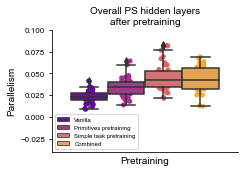

In [142]:
plt.figure(figsize=(3.5,2.5))
ax = sns.boxplot(x="NumPracticedTasks",y="PSavg",hue='Training',palette='plasma',data=df_all)
sns.stripplot(x="NumPracticedTasks",y="PSavg",hue='Training',palette='plasma',dodge=True,data=df_all,zorder=0)
plt.title('Overall PS hidden layers\nafter pretraining', fontsize=10)
plt.xlabel('Pretraining', fontsize=10)
plt.ylabel('Parallelism', fontsize=10)
plt.xticks([],fontsize=8);
plt.yticks(fontsize=8);
# plt.ylim([0.2,.5])
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:4], labels[0:4],fontsize=6)
# When creating the legend, only use the first two elements
# to effectively remove the last two.
# l = plt.legend(handles[0:4], labels[0:4],fontsize=8)
plt.ylim([-.04,.1])
sns.despine()
plt.tight_layout()
# plt.savefig(figuredir + 'Expt10_ModelPS_Average_ZeroShot.png', dpi=300)

# Run statistical tests
t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Primitives pretraining'].values[1:],df_all.PSavg[df_all.Training=='Vanilla'].values[1:])
print('Primitives pretraining vs. vanilla PS avg')
print('\t t =', t, '| p =', p)

t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Simple task pretraining'].values[1:],df_all.PSavg[df_all.Training=='Vanilla'].values[1:])
print('Simple task pretraining vs. vanilla PS avg')
print('\t t =', t, '| p =', p)

t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Simple task pretraining'].values[1:],df_all.PSavg[df_all.Training=='Primitives pretraining'].values[1:])
print('Simple task pretraining vs. Primitives pretraining PS avg')
print('\t t =', t, '| p =', p)
      
t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Combined'].values[1:],df_all.PSavg[df_all.Training=='Simple task pretraining'].values[1:])
print('Combined vs. Simple task pretraining PS avg')
print('\t t =', t, '| p =', p)

t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Combined'].values[1:],df_all.PSavg[df_all.Training=='Primitives pretraining'].values[1:])
print('Combined vs. Concept pretraining PS avg')
print('\t t =', t, '| p =', p)

92.14127604166669
Primitives accuracy v. chance
	 acc = 23.24502537393162 t = -2.1679911550313866 | p = 0.9817554142312601
Primitives pretraining accuracy v. chance
	 acc = 31.505742521367512 t = 8.08880632450488 | p = 8.714169374988498e-10
Simple task pretraining vs. Primitives pretraining accuracy
	 acc = 70.5744190705128 t = 19.84209319783974 | p = 8.685482362049663e-32
Combined vs. Simple task pretraining accuracy
	 acc = 92.15110844017094 t = 10.848470191267507 | p = 4.22342827972992e-17


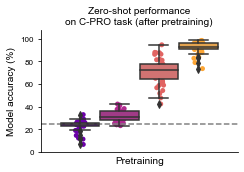

In [143]:
print(df_all.Accuracy[df_all.Training=='Combined'].mean())
plt.figure(figsize=(3.5,2.5))
sns.boxplot(x="NumPracticedTasks",y="Accuracy",hue='Training',palette='plasma',data=df_all)
sns.stripplot(x="NumPracticedTasks",y="Accuracy",hue='Training',palette='plasma',data=df_all,dodge=True,zorder=0)
plt.plot(np.arange(-.5,1.5),np.repeat(25.0,2),'gray',linestyle='--',label='Chance')
plt.title('Zero-shot performance\non C-PRO task (after pretraining)', fontsize=10)
plt.xlabel('Pretraining', fontsize=10)
plt.ylabel('Model accuracy (%)', fontsize=10)
plt.xticks([],fontsize=8);
plt.yticks(fontsize=8);
plt.legend().remove()
plt.ylim([0,108])
plt.xlim([-.5,.5])
plt.tight_layout()
sns.despine()
plt.savefig(figuredir + 'Expt10_ModelPerformance_ZeroShot.png', dpi=300)



# Run statistical tests
t, p = stats.ttest_1samp(df_all.Accuracy[df_all.Training=='Vanilla'].values[1:], 25)
print('Primitives accuracy v. chance')
print('\t acc =', df_all.Accuracy[df_all.Training=='Vanilla'].values[1:].mean(), 't =', t, '| p =', 1.0-p/2.0)

# Run statistical tests
t, p = stats.ttest_1samp(df_all.Accuracy[df_all.Training=='Primitives pretraining'].values[1:], 25)
print('Primitives pretraining accuracy v. chance')
print('\t acc =', df_all.Accuracy[df_all.Training=='Primitives pretraining'].values[1:].mean(), 't =', t, '| p =', p)

# Run statistical tests
t, p = stats.ttest_ind(df_all.Accuracy[df_all.Training=='Simple task pretraining'].values[1:], df_all.Accuracy[df_all.Training=='Primitives pretraining'].values[1:])
print('Simple task pretraining vs. Primitives pretraining accuracy')
print('\t acc =', df_all.Accuracy[df_all.Training=='Simple task pretraining'].values[1:].mean(), 't =', t, '| p =', p)

# Run statistical tests
t, p = stats.ttest_ind(df_all.Accuracy[df_all.Training=='Combined'].values[1:], df_all.Accuracy[df_all.Training=='Simple task pretraining'].values[1:])
print('Combined vs. Simple task pretraining accuracy')
print('\t acc =', df_all.Accuracy[df_all.Training=='Combined'].values[1:].mean(), 't =', t, '| p =', p)

# t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Simple task pretraining'].values[1:],df_all.PSavg[df_all.Training=='Vanilla'].values[1:])
# print('Simple task pretraining vs. vanilla PS avg')
# print('\t t =', t, '| p =', p)

# t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Simple task pretraining'].values[1:],df_all.PSavg[df_all.Training=='Primitives pretraining'].values[1:])
# print('Simple task pretraining vs. Primitives pretraining PS avg')
# print('\t t =', t, '| p =', p)
      
# t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Combined'].values[1:],df_all.PSavg[df_all.Training=='Simple task pretraining'].values[1:])
# print('Combined vs. Simple task pretraining PS avg')
# print('\t t =', t, '| p =', p)

# t, p = stats.ttest_ind(df_all.PSavg[df_all.Training=='Combined'].values[1:],df_all.PSavg[df_all.Training=='Primitives pretraining'].values[1:])
# print('Combined vs. Concept pretraining PS avg')
# print('\t t =', t, '| p =', p)

## Plot PS as a function of depth for 'combined' pretraining

#### First load in vanilla model with CPRO task training (from expt 8)

In [39]:
df_vanilla_cprotrained = pd.DataFrame()
for i in range(simstart,simend):
    tmp = pd.read_csv(datadir + 'expt10c_adam_90accCutOff_2layers_practice_simData' + str(i) + '.csv')
    tmp.insert(len(tmp.columns),"Simulation",list(np.repeat(i,len(tmp))),True)
    tmp.insert(len(tmp.columns),"Training",list(np.repeat('Vanilla',len(tmp))),True)
    df_vanilla_cprotrained = df_vanilla_cprotrained.append(tmp)

Vanilla network statistical testing
	 Sensory Depth 1 vs. 2 | t = 1.4701638021353713 | p = 0.14553982086889652
	 Logic Depth 1 vs. 2 | t = 1.3480616171424684 | p = 0.1815405495140293
	 Motor Depth 1 vs. 2 | t = 1.7247415638438057 | p = 0.08853474597980673
Combined network statistical testing
	 Sensory Depth 1 vs. 2 | t = 8.803492040412666 | p = 2.5968750977356545e-13
	 Logic Depth 1 vs. 2 | t = -2.6599605136629334 | p = 0.009482055509266044
	 Motor Depth 1 vs. 2 | t = -3.8746207520302445 | p = 0.0002209848410177782
Trained vanilla network statistical testing
	 Sensory Depth 1 vs. 2 | t = 9.639277217346068 | p = 6.245933857098805e-15
	 Logic Depth 1 vs. 2 | t = -0.4618477086709746 | p = 0.6454760954655236
	 Motor Depth 1 vs. 2 | t = -6.028991140372133 | p = 5.164949910457814e-08


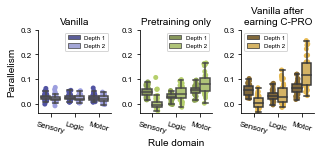

In [113]:
vanilla_palette = [sns.color_palette("tab20b")[1],sns.color_palette("tab20b")[3]]
pretrained_palette = [sns.color_palette("tab20b")[5],sns.color_palette("tab20b")[6]]
depth_palette = [sns.color_palette("tab20b")[8],sns.color_palette("tab20b")[10]]


df_ps_combined = {}
df_ps_combined['Depth'] = []
df_ps_combined['DepthCount'] = []
df_ps_combined['Parallelism'] = []
df_ps_combined['Domain'] = []
df_ps_combined['Simulation'] = []
df_ps_combined['Accuracy'] = []
df_ps_combined['Samples'] = []

df_ps_vanilla = {}
df_ps_vanilla['Depth'] = []
df_ps_vanilla['DepthCount'] = []
df_ps_vanilla['Parallelism'] = []
df_ps_vanilla['Domain'] = []
df_ps_vanilla['Simulation'] = []
df_ps_vanilla['Accuracy'] = []
df_ps_vanilla['Samples'] = []

df_ps_vanilla_trained = {}
df_ps_vanilla_trained['Depth'] = []
df_ps_vanilla_trained['DepthCount'] = []
df_ps_vanilla_trained['Parallelism'] = []
df_ps_vanilla_trained['Domain'] = []
df_ps_vanilla_trained['Simulation'] = []
df_ps_vanilla_trained['Accuracy'] = []
df_ps_vanilla_trained['Samples'] = []

for i in range(simstart,simend):
    # Concept pretraining
    tmpdf = df_adam0_combined.loc[df_adam0_combined.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_combined['Simulation'].append(i)
            df_ps_combined['Depth'].append('Depth ' + str(depth))
            df_ps_combined['DepthCount'].append(depth)
            df_ps_combined['Domain'].append(rule)
            df_ps_combined['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])
            df_ps_combined['Samples'].append(tmpdf.NumPretrainingTrials.values[0]+tmpdf.NumActualTrials.values[0])
            df_ps_combined['Accuracy'].append(tmpdf.Accuracy.values[0])

    # Vanilla 
    tmpdf = df_adam0_nopretraining.loc[df_adam0_nopretraining.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==0]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_vanilla['Simulation'].append(i)
            df_ps_vanilla['Depth'].append('Depth ' + str(depth))
            df_ps_vanilla['DepthCount'].append(depth)
            df_ps_vanilla['Domain'].append(rule)
            df_ps_vanilla['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])
            df_ps_vanilla['Samples'].append(tmpdf.NumPretrainingTrials.values[0]+tmpdf.NumActualTrials.values[0])
            df_ps_vanilla['Accuracy'].append(tmpdf.Accuracy.values[0])
            
    # Vanilla -- CPRO trained
    tmpdf = df_vanilla_cprotrained.loc[df_vanilla_cprotrained.Simulation==i]
    tmpdf = tmpdf.loc[tmpdf.NumPracticedTasks==60]
    for depth in range(1,3):
        for rule in ['Sensory','Logic','Motor']:
            df_ps_vanilla_trained['Simulation'].append(i)
            df_ps_vanilla_trained['Depth'].append('Depth ' + str(depth))
            df_ps_vanilla_trained['DepthCount'].append(depth)
            df_ps_vanilla_trained['Domain'].append(rule)
            df_ps_vanilla_trained['Parallelism'].append(tmpdf[rule + 'PS' + str(depth)].values[0])
            df_ps_vanilla_trained['Samples'].append(tmpdf.NumPretrainingTrials.values[0]+tmpdf.NumActualTrials.values[0])
            df_ps_vanilla_trained['Accuracy'].append(tmpdf.Accuracy.values[0])


df_ps_combined = pd.DataFrame(df_ps_combined)
df_ps_vanilla = pd.DataFrame(df_ps_vanilla)
df_ps_vanilla_trained = pd.DataFrame(df_ps_vanilla_trained)

plt.figure(figsize=(4.56,2.25))

plt.subplot(131)
ax = sns.boxplot(x="Domain",y="Parallelism",hue="Depth",palette=vanilla_palette,data=df_ps_vanilla,sym='')
sns.stripplot(x="Domain",y="Parallelism",hue="Depth",palette=vanilla_palette,dodge=True,data=df_ps_vanilla,zorder=0)
plt.title('Vanilla', fontsize=10)
plt.xlabel(None,fontsize=10)
plt.ylabel('Parallelism', fontsize=10)
plt.xticks(fontsize=8,rotation=-15);
plt.yticks(fontsize=8);
plt.legend()
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
plt.ylim([-.04,.3])
sns.despine()


plt.subplot(132)
ax = sns.boxplot(x="Domain",y="Parallelism",hue="Depth",palette=pretrained_palette,data=df_ps_combined,sym='')
sns.stripplot(x="Domain",y="Parallelism",hue="Depth",palette=pretrained_palette,dodge=True,data=df_ps_combined,zorder=0)
plt.title('Pretraining only', fontsize=10)
plt.xlabel('Rule domain',fontsize=10)
plt.ylabel(None, fontsize=10)
plt.xticks(fontsize=8,rotation=-15);
plt.yticks(fontsize=8);
plt.legend()
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
plt.ylim([-.04,.3])
sns.despine()

plt.subplot(133)
ax = sns.boxplot(x="Domain",y="Parallelism",hue="Depth",palette=depth_palette,data=df_ps_vanilla_trained,sym='')
sns.stripplot(x="Domain",y="Parallelism",hue="Depth",palette=depth_palette,dodge=True,data=df_ps_vanilla_trained,zorder=0)
plt.title('Vanilla after\nearning C-PRO', fontsize=10)
plt.xlabel(None,fontsize=10)
plt.ylabel(None, fontsize=10)
plt.xticks(fontsize=8,rotation=-15);
plt.yticks(fontsize=8);
plt.legend()
handles, labels = ax.get_legend_handles_labels()
# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2],fontsize=6)
plt.ylim([-.04,.3])
sns.despine()
plt.tight_layout()
# plt.savefig(figuredir + '../Fig6_ANNPS_PostTraining/Expt10_PSbyDepth.png',dpi=300)


print('Vanilla network statistical testing')
for domain in ['Sensory','Logic','Motor']:
    tmp = df_ps_vanilla.loc[df_ps_vanilla.Domain==domain]
    t, p = stats.ttest_ind(tmp.Parallelism[tmp.Depth=='Depth 1'],tmp.Parallelism[tmp.Depth=='Depth 2'])
    print('\t', domain, 'Depth 1 vs. 2 | t =', t, '| p =', p)

print('Combined network statistical testing')
for domain in ['Sensory','Logic','Motor']:
    tmp = df_ps_combined.loc[df_ps_combined.Domain==domain]
    t, p = stats.ttest_ind(tmp.Parallelism[tmp.Depth=='Depth 1'],tmp.Parallelism[tmp.Depth=='Depth 2'])
    print('\t', domain, 'Depth 1 vs. 2 | t =', t, '| p =', p)
    
print('Trained vanilla network statistical testing')
for domain in ['Sensory','Logic','Motor']:
    tmp = df_ps_vanilla_trained.loc[df_ps_vanilla_trained.Domain==domain]
    t, p = stats.ttest_ind(tmp.Parallelism[tmp.Depth=='Depth 1'],tmp.Parallelism[tmp.Depth=='Depth 2'])
    print('\t', domain, 'Depth 1 vs. 2 | t =', t, '| p =', p)
    

In [106]:

df_vanilla_tmp = df_ps_vanilla.groupby('Simulation').mean()
df_vanilla_tmp.insert(len(df_vanilla_tmp.columns),"Model",list(np.repeat('Vanilla',len(df_vanilla_tmp))),True)

df_combined_tmp = df_ps_combined.groupby('Simulation').mean()
df_combined_tmp.insert(len(df_combined_tmp.columns),"Model",list(np.repeat('Pretrained',len(df_combined_tmp))),True)

df_vanillatrained_tmp = df_ps_vanilla_trained.groupby('Simulation').mean()
df_vanillatrained_tmp.insert(len(df_vanillatrained_tmp.columns),"Model",list(np.repeat('Trained Vanilla',len(df_vanillatrained_tmp))),True)
df_vanillatrained_tmp.Accuracy = df_ps_vanilla_trained.Accuracy*100

df_comparison = pd.concat([df_vanilla_tmp,df_combined_tmp,df_vanillatrained_tmp])

palette = [sns.color_palette("tab20b")[2],sns.color_palette("tab20b")[6],sns.color_palette("tab20b")[10]]

In [121]:
df_comparison.Model.unique()

array(['Vanilla', 'Pretrained', 'Trained Vanilla'], dtype=object)

Mean generalization performance and sample efficiency metrics
Vanilla accuracy: 23.229817708333336 | Sample efficiency: 0.0
Pretrained accuracy: 92.1412760416667 | Sample efficiency: 1620508.8
Vanilla trained accuracy: 96.025390625 | Sample efficiency: 6861312.0
Proportion of samples on the trained vanilla model relative to pretrained model: 4.234047973081047


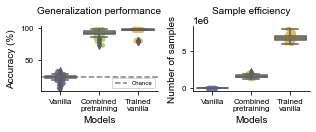

In [128]:

plt.figure(figsize=(4.5,2.))
plt.subplot(121)
ax = sns.boxplot(x="Model",y="Accuracy",palette=palette,data=df_comparison)
sns.stripplot(x="Model",y="Accuracy",palette=palette,dodge=True,data=df_comparison,zorder=0)
plt.plot(np.arange(-0.5,3.5),np.repeat(25,4),'gray',linestyle='--',label='Chance')
plt.title('Generalization performance', fontsize=10,y=1.1)
plt.xlabel('Models',fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=10)
plt.xticks(np.arange(3), ['Vanilla','Combined\npretraining','Trained\nvanilla'],fontsize=8);
plt.yticks(fontsize=8);
plt.legend(fontsize=6)
# plt.ylim([-.04,.3])
sns.despine()


plt.subplot(122)
ax = sns.boxplot(x="Model",y="Samples",palette=palette,data=df_comparison)
sns.stripplot(x="Model",y="Samples",palette=palette,dodge=True,data=df_comparison,zorder=0)
plt.title('Sample efficiency', fontsize=10,y=1.1)
plt.xlabel('Models',fontsize=10)
plt.ylabel('Number of samples', fontsize=10)
# plt.xticks(fontsize=8,rotation=-15);
plt.xticks(np.arange(3), ['Vanilla','Combined\npretraining','Trained\nvanilla'],fontsize=8);
plt.yticks(fontsize=8);
# plt.ylim([-.04,.3])
sns.despine()

plt.tight_layout()
# plt.savefig(figuredir + '../Fig6_ANNPS_PostTraining/Expt10_SampleEfficiencyAndPerformance.png',dpi=300)


print('Mean generalization performance and sample efficiency metrics')
print('Vanilla accuracy:', df_comparison.loc[df_comparison.Model=='Vanilla'].Accuracy.mean(), '| Sample efficiency:', df_comparison.loc[df_comparison.Model=='Vanilla'].Samples.mean())
print('Pretrained accuracy:', df_comparison.loc[df_comparison.Model=='Pretrained'].Accuracy.mean(), '| Sample efficiency:', df_comparison.loc[df_comparison.Model=='Pretrained'].Samples.mean())
print('Vanilla trained accuracy:', df_comparison.loc[df_comparison.Model=='Trained Vanilla'].Accuracy.mean(), '| Sample efficiency:', df_comparison.loc[df_comparison.Model=='Trained Vanilla'].Samples.mean())
print('Proportion of samples on the trained vanilla model relative to pretrained model:', df_comparison.loc[df_comparison.Model=='Trained Vanilla'].Samples.mean()/df_comparison.loc[df_comparison.Model=='Pretrained'].Samples.mean())

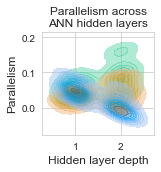

In [69]:
# df_normalized = pd.DataFrame()
# # df_normalized = df_ps_combined.copy()

# Normalize all PS and decoding scores for each domain
for domain in ['Sensory','Logic','Motor']:
    tmpdf = df_ps_combined.loc[df_ps_combined.Domain==domain].copy()
    tmpps = (tmpdf.Parallelism.values - tmpdf.Parallelism.min())/np.max(tmpdf.Parallelism.max())
    tmpdf['Parallelism'] = tmpps
    df_normalized = df_normalized.append(tmpdf)

tmp = sns.color_palette('colorblind')
palette = [tmp[2],tmp[1],tmp[0]]

plt.figure(figsize=(2.5,2.5))
ax = sns.kdeplot(x="DepthCount",y="Parallelism",hue="Domain",hue_order=['Motor','Logic','Sensory'],data=df_ps_combined,palette=palette,alpha=0.5,legend=False,shade=True)
plt.title('Parallelism across\nANN hidden layers',fontsize=12)
# plt.xticks([-5,1],['Input','Output'],fontsize=10,rotation=10)
plt.xticks(fontsize=10)
plt.xlabel('Hidden layer depth', fontsize=12)
plt.ylabel('Parallelism',fontsize=12)
plt.yticks(fontsize=10)
# ax.legend_.set_bbox_to_anchor((0, .4))
# ax.legend_._set_loc(2)
# plt.setp(ax.get_legend().get_title(), fontsize='0')
# plt.setp(ax.get_legend().get_texts(), fontsize='8')
plt.tight_layout()
# plt.savefig('ANNPSGradient.png',dpi=300)
